#Chaning Directory

In [0]:
import os

In [11]:
os.getcwd()

'/content'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/NLP/Twitter Sentiment Analysis')

#import data from kaggle on Google Colab by using Kaggle API

In [0]:
!pip install -q kaggle 

In [5]:
!pip install -q kaggle-cli 

     |████████████████████████████████| 81kB 2.5MB/s 
     |████████████████████████████████| 5.3MB 11.6MB/s 
     |████████████████████████████████| 112kB 45.5MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 112kB 41.3MB/s 


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


#downloading data from kaggle competition to Google Drive

In [7]:

!kaggle competitions download -c twitter-sentiment-analysis2

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip train.csv.zip

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


#Importing Data

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
df=pd.read_csv('train.csv',encoding='latin-1',header=None)

In [15]:
df.head()

,0,1,2
0,ItemID,Sentiment,SentimentText
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


#Adding some data

In [0]:
df[2][0]='I am not feeling good here.'

In [0]:
df[1][0]='0'
df[0][0]=0

In [18]:
df.head()

,0,1,2
0,0,0,I am not feeling good here.
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


In [0]:
df1=df.copy()

In [0]:
df.columns=['Id','Sentiment','Tweet_text']

In [21]:
df.head()

,Id,Sentiment,Tweet_text
0,0,0,I am not feeling good here.
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99990 entries, 0 to 99989
Data columns (total 3 columns):
Id            99990 non-null object
Sentiment     99990 non-null object
Tweet_text    99990 non-null object
dtypes: object(3)
memory usage: 2.3+ MB


In [23]:
df.head()

,Id,Sentiment,Tweet_text
0,0,0,I am not feeling good here.
1,1,0,is so sad for my APL frie...
2,2,0,I missed the New Moon trail...
3,3,1,omg its already 7:30 :O
4,4,0,.. Omgaga. Im sooo im gunna CRy. I'...


#Cleaning Text

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def clean_text(data,col):
  corpus=[]
  for i in range(len(data[col])):
    text=re.sub(r'http\S+', ' ', data[col][i])
    text=text.lower()
    text=re.sub(r"that's","that is",text)
    text = re.sub(r"there's","there is",text)
    text = re.sub(r"what's","what is",text)
    text = re.sub(r"where's","where is",text)
    text = re.sub(r"it's","it is",text)
    text = re.sub(r"who's","who is",text)
    text = re.sub(r"i'm","i am",text)
    text = re.sub(r"she's","she is",text)
    text = re.sub(r"he's","he is",text)
    text = re.sub(r"they're","they are",text)
    text = re.sub(r"who're","who are",text)
    text = re.sub(r"ain't","am not",text)
    text = re.sub(r"wouldn't","would not",text)
    text = re.sub(r"shouldn't","should not",text)
    text = re.sub(r"can't","can not",text)
    text = re.sub(r"couldn't","could not",text)
    text = re.sub(r"won't","will not",text)
    text=re.sub(r'[@#\$%&\*\(\)\<\>\?\!\;\'\\-\_"]',' ',text)
    text= re.sub(r'\W',' ',text)
    text=re.sub(r'\d',' ',text)
    text=re.sub(r'^[a-z]\s',' ',text)
    text=re.sub(r'\s+[a-z]\s+',' ',text)
    text=re.sub(r'\s+[a-z]$',' ',text)
    text=re.sub(r'\s+',' ',text)
    corpus.append(text)
  return corpus

In [0]:
df['Tweet_text']=clean_text(df,'Tweet_text')

In [0]:
def remove_stopword(data,col):
  corpus=[]
  s=set(stopwords.words('english'))
  s1=['not','or','no','nor']
  for i in s1:
    if i in s:
      s.remove(i)
  for i in range(len(data[col])):
    words = nltk.word_tokenize(data[col][i])
    word1 = [word for word in words if word not in s]
    corpus.append(' '.join(word1))
  return corpus


In [0]:
df['Tweet_text']=remove_stopword(df,'Tweet_text')

# **Word2Vec**

In [0]:
from gensim.models import Word2Vec

In [0]:
sentences = [nltk.word_tokenize(sentence) for sentence in df['Tweet_text']]

In [0]:
Wmodel = Word2Vec(sentences,size=200,window=5,workers=4,min_count=1)

In [0]:
Wmodel.build_vocab(sentences,update=True)

In [0]:
words=Wmodel.wv.vocab.keys()

In [34]:
vocab_size=len(words)
print(len(words))

94954


In [35]:
Wmodel.train(sentences=sentences, total_examples=len(sentences), epochs=25)

(18435483, 19603750)

In [36]:
len(Wmodel.wv.vocab)

94954

In [37]:
Wmodel.wv.most_similar("fine")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('ok', 0.47200456261634827),
 ('twilightfan', 0.4325796961784363),
 ('ddms', 0.43129491806030273),
 ('okay', 0.4194006323814392),
 ('cycles', 0.41836923360824585),
 ('problem', 0.4059828519821167),
 ('confident', 0.4042120575904846),
 ('anjosinthedark', 0.40103545784950256),
 ('alright', 0.3998209238052368),
 ('resolving', 0.3994060754776001)]

In [38]:
Wmodel.wv.most_similar('feeling')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('feelin', 0.668088436126709),
 ('feels', 0.574516236782074),
 ('feel', 0.5674624443054199),
 ('biggestsonicfan', 0.5663382411003113),
 ('branwen', 0.5541131496429443),
 ('alitaylor', 0.5343363285064697),
 ('arynna', 0.5329161286354065),
 ('defeiend', 0.5274549126625061),
 ('andiheartsyew', 0.5250714421272278),
 ('aceuptop', 0.5213112831115723)]

In [39]:
Wmodel.wv.most_similar("great")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('wonderful', 0.563762903213501),
 ('gr', 0.5504281520843506),
 ('fantastic', 0.5280910730361938),
 ('lovely', 0.5257164835929871),
 ('awesome', 0.5108277201652527),
 ('fab', 0.4912419617176056),
 ('fabulous', 0.4837929308414459),
 ('beautiful', 0.47223299741744995),
 ('amazing', 0.45053625106811523),
 ('gorgeous', 0.4320034980773926)]

#Creating tfidf model

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features = 5000, min_df = 3, max_df = 0.8)
X = vectorizer.fit_transform(df['Tweet_text']).toarray()

In [0]:
# Creating the Tf-Idf Model
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(X).toarray()

In [65]:
df['Sentiment'].replace({'0':0,'1':1},inplace=True)

TypeError: ignored

In [0]:
type(df['Sentiment'][99])

In [0]:
X.shape

In [0]:
df.head()

In [0]:
y=df['Sentiment'].values

In [0]:
y.shape

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=0)

In [0]:
print(X_train.shape)
print(y_train.shape)

In [0]:
print(X_test.shape)
print(y_test.shape)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler=MinMaxScaler()

In [0]:
X_train=scaler.fit_transform(X_train)

In [0]:
X_test=scaler.transform(X_test)

In [69]:
print(X_train.shape)
print(y_train.shape)

(89991, 5000)
(89991,)


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.regularizers import l2


In [0]:
model = Sequential()
model.add(Dense(500,activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(250,activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(125,activation='relu',))
model.add(Dense(1,activation='sigmoid'))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
model.fit(x=X_train,y=y_train,batch_size=256,epochs=50,validation_data=(X_test,y_test))

Train on 89991 samples, validate on 9999 samples
Epoch 1/50
89991/89991 [==============================] - 4s 49us/step - loss: 1.1514 - acc: 0.6875 - val_loss: 0.5939 - val_acc: 0.7375
Epoch 2/50
89991/89991 [==============================] - 4s 41us/step - loss: 0.5817 - acc: 0.7374 - val_loss: 0.5655 - val_acc: 0.7395
Epoch 3/50
89991/89991 [==============================] - 4s 41us/step - loss: 0.5534 - acc: 0.7509 - val_loss: 0.5458 - val_acc: 0.7508
Epoch 4/50
89991/89991 [==============================] - 4s 40us/step - loss: 0.5445 - acc: 0.7533 - val_loss: 0.5433 - val_acc: 0.7416
Epoch 5/50
89991/89991 [==============================] - 4s 39us/step - loss: 0.5403 - acc: 0.7553 - val_loss: 0.5426 - val_acc: 0.7502
Epoch 6/50
89991/89991 [==============================] - 4s 39us/step - loss: 0.5382 - acc: 0.7578 - val_loss: 0.5372 - val_acc: 0.7550
Epoch 7/50
89991/89991 [==============================] - 4s 39us/step - loss: 0.5380 - acc: 0.7577 - val_loss: 0.5497 - val_acc:

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('husl')

<Figure size 864x720 with 0 Axes>

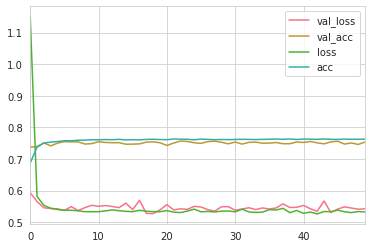

In [97]:
plt.figure(figsize=(12,10))
pd.DataFrame(model.history.history).plot()

In [0]:
y_pred=model.predict(X_test)

In [0]:
def sentiment(prob):
  if prob>=0.5:
    return 1
  else:
      return 0

In [0]:
def sentiment_pred(prob):
  y_senti=[]
  for i in range(len(prob)):
    y_senti.append(sentiment(prob[i]))
  return y_senti

In [0]:
y_senti=sentiment_pred(y_pred)

In [0]:
from sklearn.metrics import accuracy_score,classification_report

In [89]:
accuracy_score(y_test,y_senti)

0.7536753675367537

In [90]:
print(classification_report(y_test,y_senti))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      4399
           1       0.79      0.77      0.78      5600

    accuracy                           0.75      9999
   macro avg       0.75      0.75      0.75      9999
weighted avg       0.75      0.75      0.75      9999



#Saving Model

In [0]:
import pickle

In [0]:
with open('model_tfidf.pickle','wb') as f:
  pickle.dump(model,f)